## 2024 Mobile Data Analyisis

#### Import libraries

Install libraries if neccessary with commands:
!pip install kagglehub

In [1]:
import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\Users\34673\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Download the dataset from kaggle

In [2]:
# Download the dataset from kaggle
path = kagglehub.dataset_download("willianoliveiragibin/phone-information-2024")
files = os.listdir(path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['processed_data news.csv']


In [3]:
#Read dataframe from csv
file_path = os.path.join(path, files[0])
df = pd.read_csv(file_path)
df.head()

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,...,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
0,apple,Apple iPhone X,Amazon DE,213.85,EUR,231.73,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),...,Apple A11 Bionic (10 nm),Hexa-core 2.39 GHz (2x Monsoon + 4x Mistral),Apple GPU (three-core graphics),2017,0,458,16.978.300.000.000.000,197.315,22.484.699.999.999.900,high price
1,apple,Apple iPhone X,Amazon US,162.90,USD,162.90,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),...,Apple A11 Bionic (10 nm),Hexa-core 2.39 GHz (2x Monsoon + 4x Mistral),Apple GPU (three-core graphics),2017,0,458,16.978.300.000.000.000,197.315,22.484.699.999.999.900,low price
2,samsung,Samsung Galaxy S9+,Amazon DE,117.84,EUR,127.69,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,Exynos 9810 (10 nm) - EMEA,Octa-core (4x2.7 GHz Mongoose M3 & 4x1.8 GHz C...,Mali-G72 MP18 - EMEA,2018,0,529,14.129.600.000.000.000,214.560,311.688,low price
3,samsung,Samsung Galaxy S9+,Amazon DE,279.00,EUR,302.32,128,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,Exynos 9810 (10 nm) - EMEA,Octa-core (4x2.7 GHz Mongoose M3 & 4x1.8 GHz C...,Mali-G72 MP18 - EMEA,2018,0,529,14.129.600.000.000.000,214.560,311.688,medium price
4,samsung,Samsung Galaxy S9+,Amazon DE,309.04,EUR,334.88,256,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,Exynos 9810 (10 nm) - EMEA,Octa-core (4x2.7 GHz Mongoose M3 & 4x1.8 GHz C...,Mali-G72 MP18 - EMEA,2018,0,529,14.129.600.000.000.000,214.560,311.688,high price


#### Exploratory Data Analysis (EDA)

In [4]:
#Get columns information about nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   phone_brand         1715 non-null   object 
 1   phone_model         1715 non-null   object 
 2   store               1715 non-null   object 
 3   price               1715 non-null   float64
 4   currency            1715 non-null   object 
 5   price_USD           1715 non-null   float64
 6   storage             1715 non-null   int64  
 7   ram                 1715 non-null   int64  
 8   Launch              1715 non-null   object 
 9   Dimensions          1715 non-null   object 
 10  Weight              1712 non-null   float64
 11  Display_Type        1715 non-null   object 
 12  Display_Size        1715 non-null   float64
 13  Display_Resolution  1715 non-null   object 
 14  OS                  1715 non-null   object 
 15  NFC                 1715 non-null   int64  
 16  USB   

In [5]:
#Get columns that have missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Weight    3
dtype: int64

In [6]:
#Get those rows that have missing values
df[df["Weight"].isnull() == True]

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,...,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
1042,tecno,Tecno Spark Go 2023,Amazon DE,109.79,EUR,118.97,64,3,2023-01-24,163.9 x 75.5 x 8.9 mm (6.45 x 2.97 x 0.35 in),...,Mediatek MT6761 Helio A22 (12 nm),Quad-core 2.0 GHz Cortex-A53,PowerVR GE8320,2023,0,267,118.913,330.675,999.99,medium price
1151,tecno,Tecno Spark 10 5G,Amazon DE,145.94,EUR,158.14,128,8,2023-04-07,164.4 x 75.5 x 8.4 mm (6.47 x 2.97 x 0.33 in),...,Mediatek Dimensity 6020 (7 nm),Octa-core (2x2.2 GHz Cortex-A76 & 6x2.0 GHz Co...,Mali-G57 MC2,2023,0,267,118.913,330.675,999.99,medium price
1395,tecno,Tecno Spark Go 2024,Amazon DE,114.94,EUR,124.55,128,4,2023-12-07,163.7 x 75.6 x 8.6 mm (6.44 x 2.98 x 0.34 in),...,Unisoc T606 (12 nm),Octa-core (2x1.6 GHz Cortex-A75 & 6x1.6 GHz Co...,Mali-G57 MP1,2023,0,267,118.913,330.675,999.99,medium price


In [7]:
#Check numbers of phones from this brand and the store to check if a relation exists
len(df[df["phone_brand"]=="tecno"]), len(df[df["store"]=="Amazon DE"])

(5, 585)

Due to tecno is a "new brand", probably seller has not all information available. Later on, we will be replacing NaN values using replacement techniques.

In [8]:
#Get basic info from numerical variables
df.describe()

,price,price_USD,storage,ram,Weight,Display_Size,NFC,BATTERY,Year,Foldable,PPI_Density,quantile_50
count,1715.000000,1715.000000,1715.000000,1715.000000,1712.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000,1715.000000
mean,381.338560,420.052589,271.286297,7.973178,195.212266,6.565038,0.917201,4657.909038,2022.050146,0.048397,403.793586,314.535720
std,334.142684,361.986094,207.263335,3.422996,24.714075,0.382489,0.275658,693.623964,1.427699,0.214665,71.649872,114.271852
min,49.000000,52.630000,32.000000,2.000000,135.000000,4.700000,0.000000,1821.000000,2017.000000,0.000000,179.000000,197.315000
25%,149.740000,167.890000,128.000000,6.000000,183.500000,6.500000,1.000000,4500.000000,2021.000000,0.000000,393.000000,247.180000
50%,249.990000,279.000000,256.000000,8.000000,193.250000,6.600000,1.000000,5000.000000,2022.000000,0.000000,402.000000,249.990000
75%,499.475000,551.145000,256.000000,12.000000,204.000000,6.700000,1.000000,5000.000000,2023.000000,0.000000,446.000000,330.675000
max,2179.460000,2361.660000,1000.000000,24.000000,627.000000,12.400000,1.000000,10200.000000,2024.000000,1.000000,643.000000,552.385000


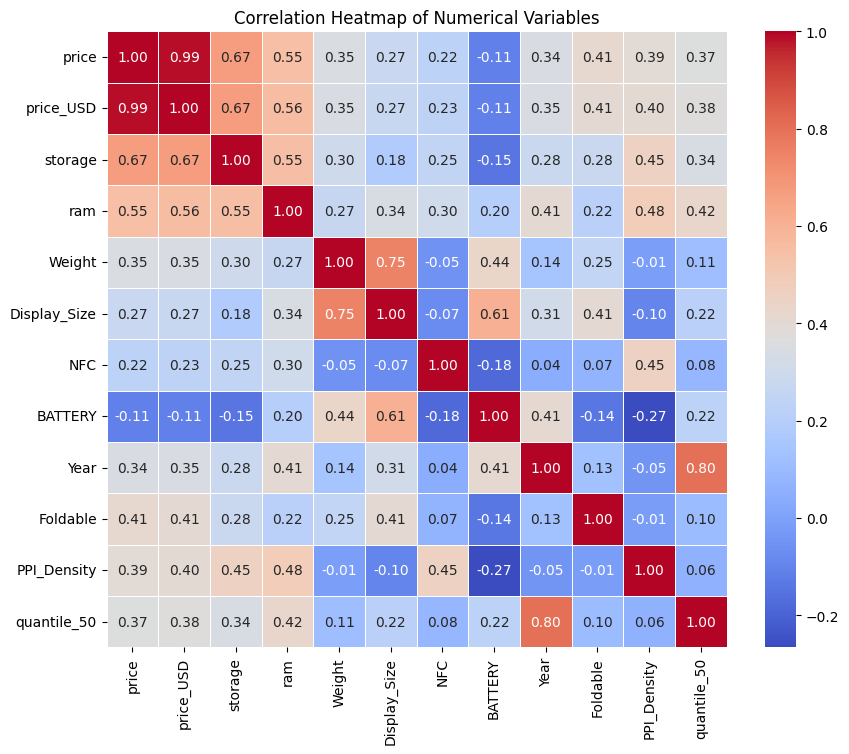

In [9]:
#Get numerical columns
numerical_df = df.select_dtypes(include=['number'])

#Get correlation matrix of numerical columns
correlation_matrix = numerical_df.corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### Data cleaning

In this section, null values will be replaced, but also we will be deleting those columns that will not be neccessary

* Replacing null values in Weight column

In [10]:
#Get index of null values to use them later
nan_indices = df[df['Weight'].isnull()].index.tolist()

#Create a copy of original dataframe
df_clean = df.copy()

#Replace nan values with mean and show them
df_clean['Weight'] = df_clean['Weight'].fillna(df_clean['Weight'].mean())
df_clean.loc[nan_indices, ["Weight", "Display_Size"]]

,Weight,Display_Size
1042,195.212266,6.6
1151,195.212266,6.6
1395,195.212266,6.6


It could be a good approach in case others mobiles with similar display_size have similar weights

In [11]:
#Get weight and display_size of mobiles with display_size = 6.6
weight_display_df = df.loc[df["Display_Size"]==6.6, ["Weight", "Display_Size"]]

#Get basic info of them
weight_display_df.describe()

,Weight,Display_Size
count,126.000000,1.290000e+02
mean,195.250000,6.600000e+00
std,10.897844,8.916411e-16
min,166.000000,6.600000e+00
25%,193.000000,6.600000e+00
50%,195.000000,6.600000e+00
75%,202.000000,6.600000e+00
max,222.000000,6.600000e+00


The value obtained for null weights is too similar to original mean for same display_sizes (correlated variable)

* Delete those columns that will affect to predictions and that are consequence of other columns

In [12]:
#Avoid some extra price columns and quantile calcs
prediction_cols = [col for col in list(set(df_clean.columns) & set(numerical_df.columns)) 
                   if col == "price" or ("price" not in col and "quantile" not in col)]

#Get dataframe based on this columns
df_clean = df_clean[prediction_cols]
df_clean.head(2)

,storage,NFC,Display_Size,price,Weight,ram,PPI_Density,Foldable,BATTERY,Year
0,256,1,5.8,213.85,174.0,3,458,0,2716,2017
1,256,1,5.8,162.90,174.0,3,458,0,2716,2017


* Get same data types

#### Data visualization

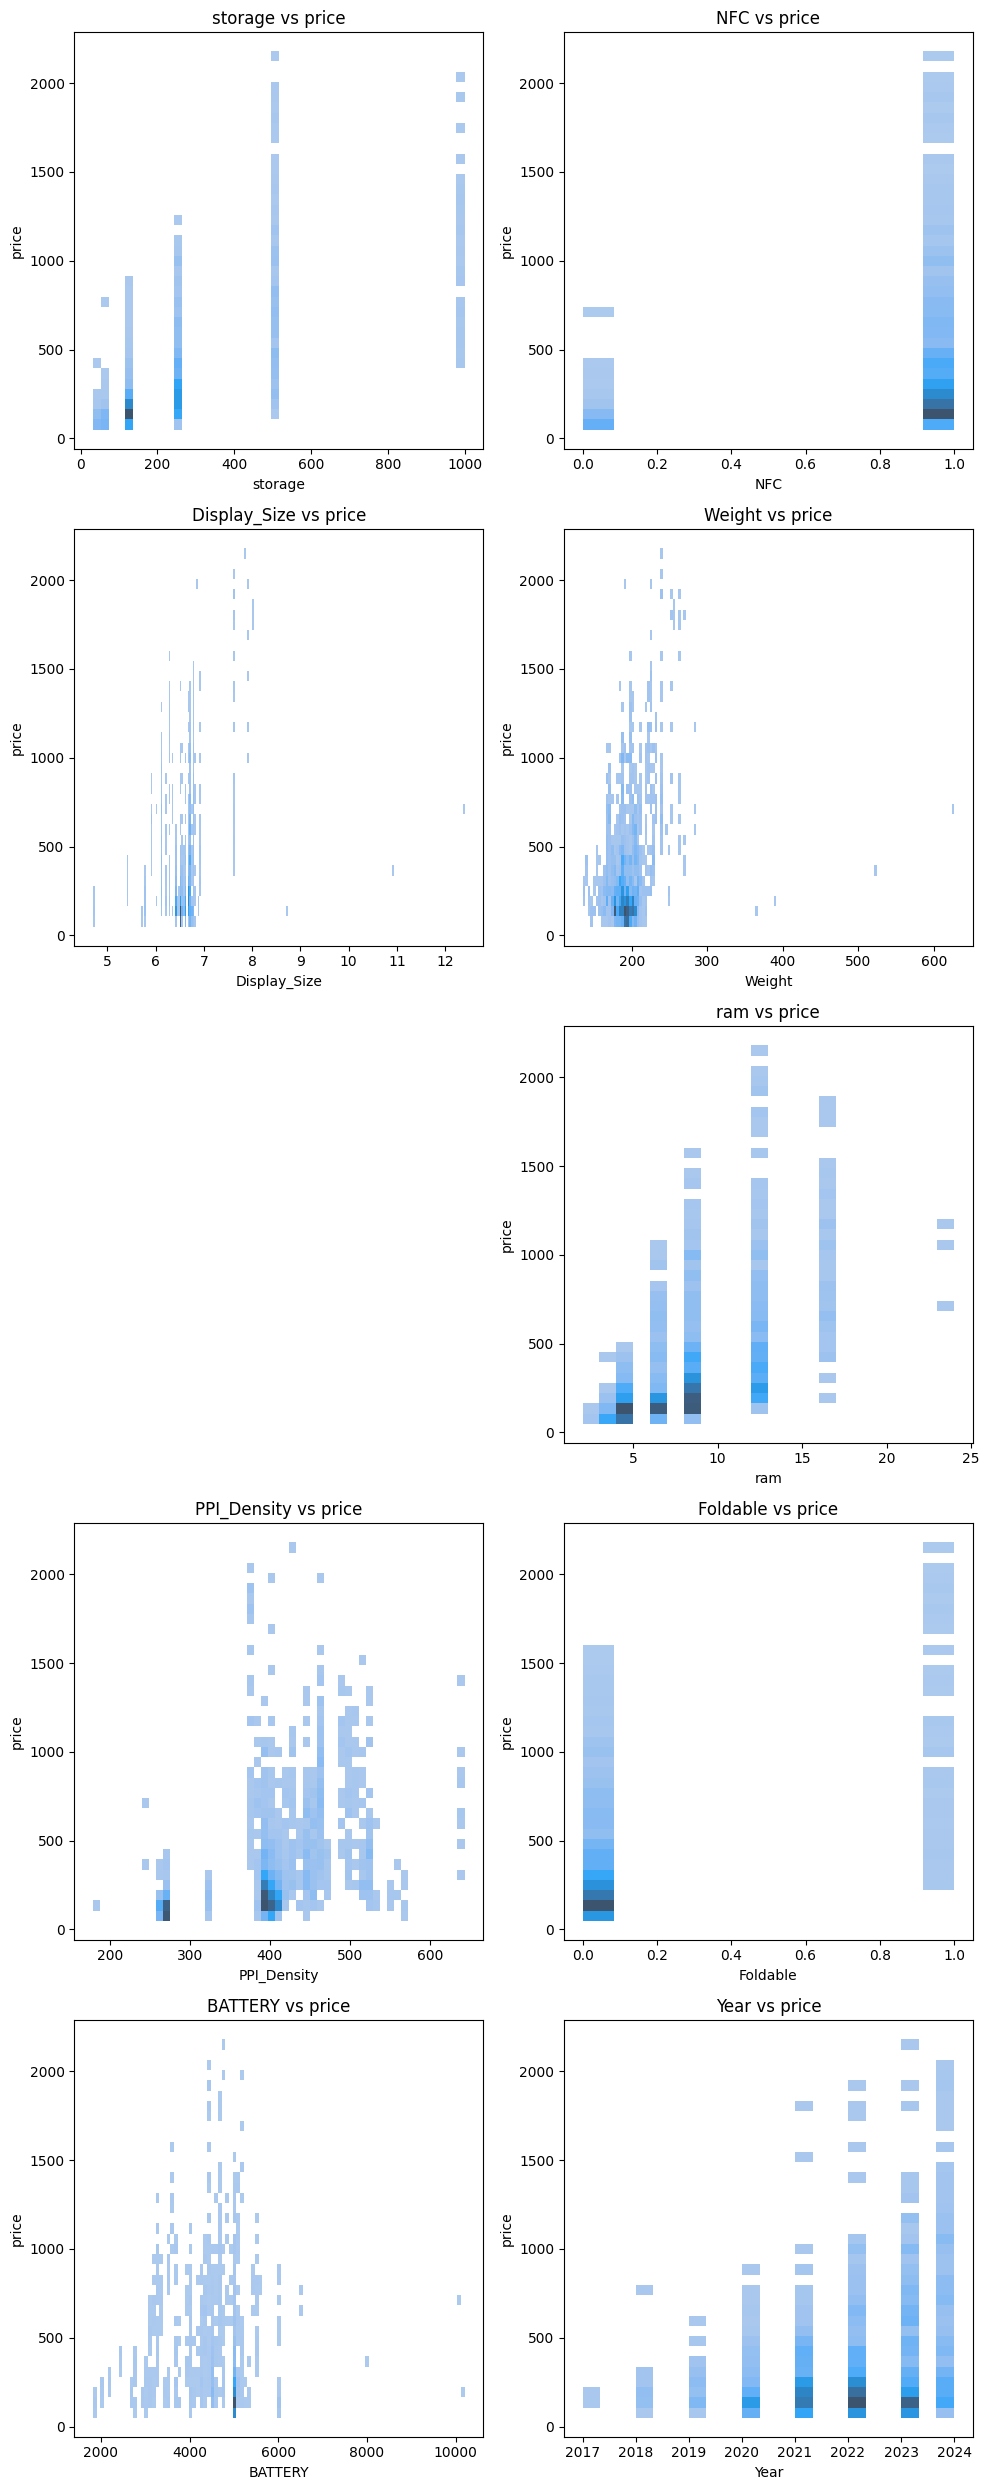

In [13]:
#Create a hist plot with seaborn
plt.figure(figsize=(10, 25))

#Get a auxiliar variable to avoid plotting x=y="price"
substract_one = False

#Loop over columns to plot them individually against price column
for i, col in enumerate(df_clean.columns, 1):
    if substract_one:
        j=i-1
        substract_one = False
    else:
        j=i
    plt.subplot(5, 2, j)
    if col != "price":
        sns.histplot(x=df_clean[col], y=df_clean['price'])
        plt.title(f'{col} vs price')
        plt.xlabel(col)
        plt.ylabel('price')
    else:
        substract_one = True

plt.tight_layout()
plt.show()


#### Data Predictions

* LinearRegression Model

In [14]:
#Divide dataframe in predictors and predicted variables
X = df_clean[[col for col in list(df_clean.columns) if col!="price"]]
y = df_clean["price"]

#Get 20% of data to test accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

#Predict some y_variables
y_pred = model.predict(X_test)

In [16]:
#Test accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Print some messages to check adjustment
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 43967.85286674123
R^2 Score: 0.6122913367627585


In [17]:
#Get some other info (intercept and coefficients of the model)
weights = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Weights (coefficients):", weights)
print("Columns: ", list(X_train.columns))

Intercept: -112691.57303343894
Weights (coefficients): [ 4.75569209e-01 -1.84528584e+01  7.87101718e+00  3.06412928e+00
  1.68704512e+01  5.69082275e-01  2.66652472e+02 -1.26755451e-01
  5.56489601e+01]
Columns:  ['storage', 'NFC', 'Display_Size', 'Weight', 'ram', 'PPI_Density', 'Foldable', 'BATTERY', 'Year']


As we can see, this is not a bad adjust at all. Lets try with price range (categorical variable)
* Random Forest

In [18]:
#Get price_range column from original dataframe
df_clean["price_range"] = df["price_range"]

#Drop price column due to is related with "price_range"
df_clean.drop(columns=["price"], inplace=True)
df_clean.head()

,storage,NFC,Display_Size,Weight,ram,PPI_Density,Foldable,BATTERY,Year,price_range
0,256,1,5.8,174.0,3,458,0,2716,2017,high price
1,256,1,5.8,174.0,3,458,0,2716,2017,low price
2,64,1,6.2,189.0,6,529,0,3500,2018,low price
3,128,1,6.2,189.0,6,529,0,3500,2018,medium price
4,256,1,6.2,189.0,6,529,0,3500,2018,high price


In [19]:
#Get X and Y dataframes
X = df_clean[[col for col in list(df_clean.columns) if col!="price_range"]]
y = df_clean["price_range"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8077669902912621

In [20]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with features and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df


,Feature,Importance
3,Weight,0.221149
5,PPI_Density,0.165972
0,storage,0.143678
2,Display_Size,0.124486
7,BATTERY,0.102530
8,Year,0.101579
4,ram,0.096516
1,NFC,0.033852
6,Foldable,0.010238


### Conclusions

* Mobile prices can be predicted with 80% accuracy using ML algorithms like Random Forest.
* The results indicate that screen quality and size, weight, and storage are the most important variables affecting mobile prices.
* Other mobile features, such as "NFC" or "Foldable," do not have a significant impact on mobile prices.
* CPU components are not measured in this algorithm, but we all know that this is an extremely important factor when buying a mobile phone.